Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'RRP', 'PERIODTYPE'], dtype='object')


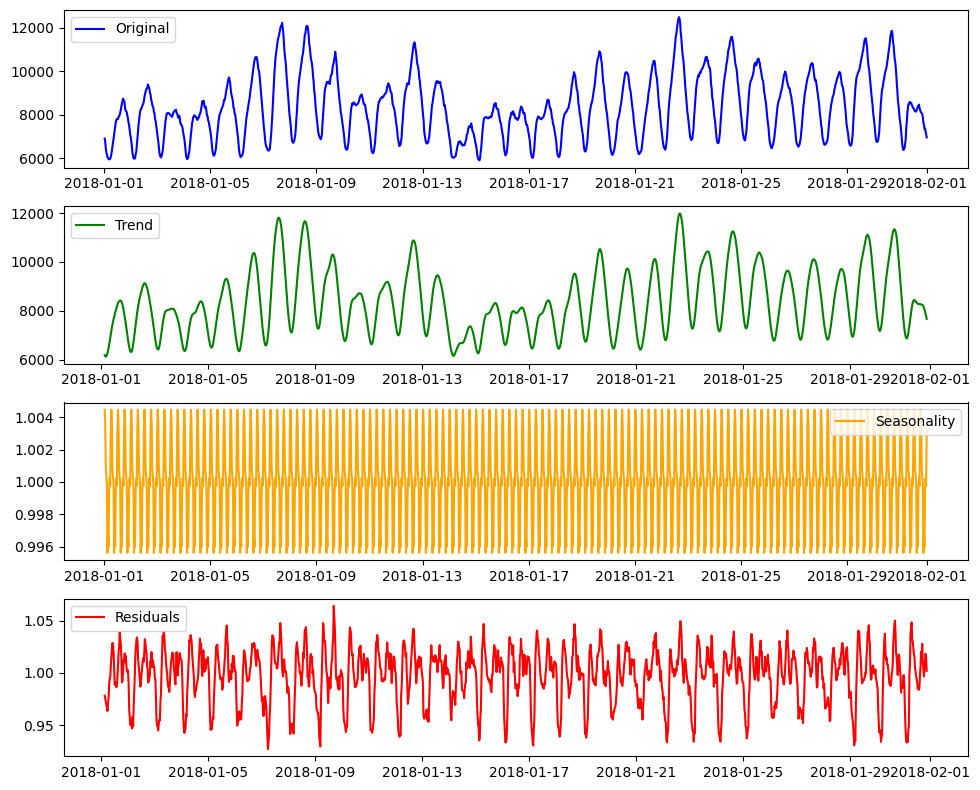

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset (example: AirPassengers dataset)
url = "/PRICE_AND_DEMAND_201801_NSW1.csv"

# Read the CSV file without parsing dates initially
df = pd.read_csv(url)

# Print the column names to check for typos or case sensitivity issues
print(df.columns)

# Assuming the actual column name is 'SETTLEMENTDATE' based on the dataset:
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'])  # Parse the correct column
df = df.set_index('SETTLEMENTDATE')  # Set the parsed column as the index

# Ensure the data is a time series
series = df['TOTALDEMAND']

# Perform decomposition
result = seasonal_decompose(series, model='multiplicative', period=12)

# Plot decomposition
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(series, label='Original', color='blue')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='green')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality', color='orange')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Residuals', color='red')
plt.legend()

plt.tight_layout()
plt.show()